In [1]:
import sample
import matplotlib.pyplot as plt

In [2]:
a = sample.Sample.from_file("sample/data/double-tap-left/0.wav")

In [3]:
vals = sample.get_all_samples(32,10)

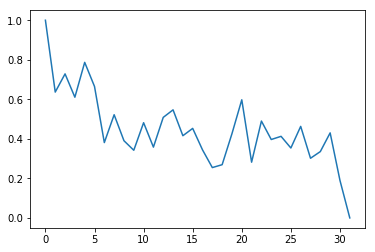

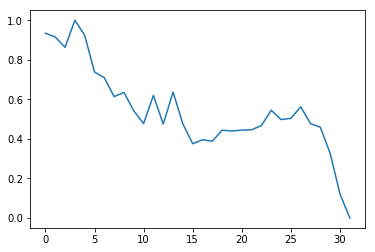

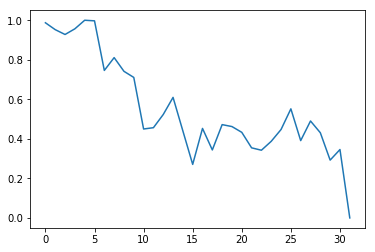

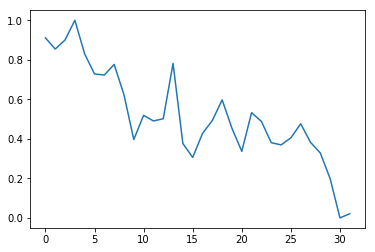

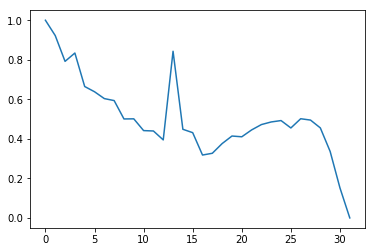

In [4]:
for i in range(len(vals['test']['double-tap-left'][1])):
    plt.plot(vals['test']['double-tap-left'][1][i])
    plt.show()

In [5]:
vals['test']

{'double-tap-left': ([3000,
   3606,
   4212,
   4818,
   5424,
   6030,
   6636,
   7242,
   7848,
   8454,
   9060,
   9666,
   10272,
   10878,
   11484,
   12090,
   12696,
   13302,
   13908,
   14514,
   15120,
   15726,
   16332,
   16938,
   17544,
   18150,
   18756,
   19362,
   19968,
   20574,
   21180,
   21786],
  [[1.0,
    0.63659802397431187,
    0.72865078444049269,
    0.61066825536864677,
    0.78695426282259673,
    0.66502428040456285,
    0.38114432650579627,
    0.52201007332326466,
    0.39048371591134784,
    0.34228862611806637,
    0.48164844502773912,
    0.35815286213721859,
    0.50854651006004759,
    0.54672960847929386,
    0.41587046780383141,
    0.4529079941621551,
    0.34429848129416463,
    0.25463818950911865,
    0.26926017373160638,
    0.42621408595097693,
    0.59756519374358086,
    0.28196130457672758,
    0.4899879895579482,
    0.3966656278469633,
    0.41267636743506375,
    0.35369141971120127,
    0.46305320015275203,
    0.3018253590